# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [53]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [6]:
# Your code to explore data and train a regression model

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [14]:
# Your code to use the trained model
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np

## Clean Data
Are ther any missing values?

In [4]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

There are no missing values. Let's look at the distribution of features to see if there are outliers. 

In [48]:
def print_stats(var):
   
# the stats
    mean_var = var.mean()
    std_var = var.std()
    min_var = var.min()
    q01_var = var.quantile(0.01)
    q25_var = var.quantile(0.25)
    median_var = var.median()
    q75_var = var.quantile(0.75)
    q99_var = var.quantile(0.99)
    max_var = var.max()
    mode_var = var.mode()[0]
    
    stats = 'Mean          : {:.2f}\nStd.Dev      : {:.2f}\nMode          : {:.2f}\nMinimum    : {:.2f}\n01-quantile: {:.2f}\n25-quantile: {:.2f}\nMedian       : {:.2f}\n75-quantile: {:.2f}\n99-quantile: {:.2f}\nMaximum   : {:.2f}'.format(
                                mean_var
                               ,std_var
                               ,mode_var
                               ,min_var
                               ,q01_var
                               ,q25_var
                               ,median_var
                               ,q75_var
                               ,q99_var 
                               ,max_var)
   
    # set up figure
    fig, ax = plt.subplots(2, 1
                    ,figsize = (15, 5)
                    ,sharex = True
                    ,gridspec_kw = {'hspace': 0
                                   ,'height_ratios': [5, 1]})
   

 
    fig.suptitle('Distribution ' + var.name)
    
    # histogram
    ax[0].hist(var,  bins = np.arange(min_var, max_var, (q99_var - q01_var)/15))
    ax[0].set_ylabel('Frequency')
    # stat-lines
    ax[0].axvline(x = q01_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = q99_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = mean_var, color = 'black', linestyle ='solid', linewidth = 2)
    ax[0].axvline(x = median_var, color = 'black', linestyle='dashed', linewidth = 2)

    ax[0].annotate(stats, xy = (.85, .5), xycoords='axes fraction')
    
    # boxplot
    ax[1].boxplot(var, vert = False)
    ax[1].set_xlabel('Value')

    ax[0].label_outer()
    fig.show()

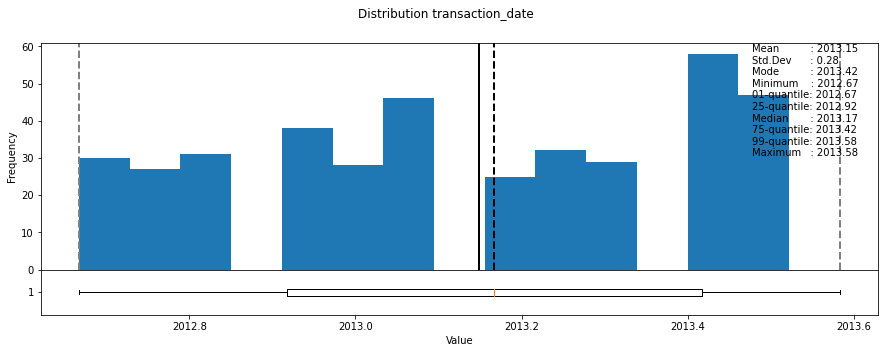

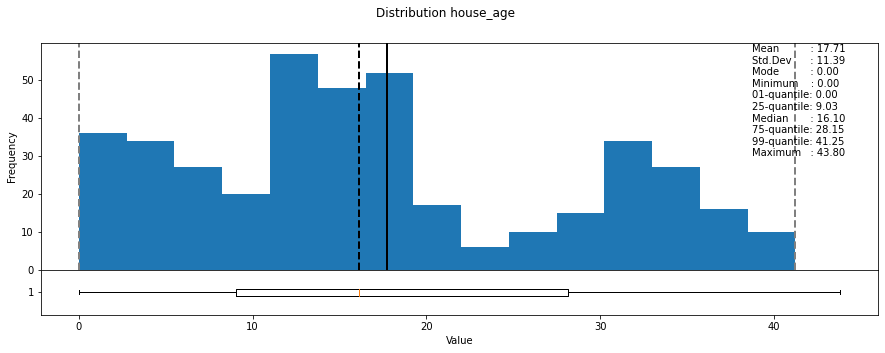

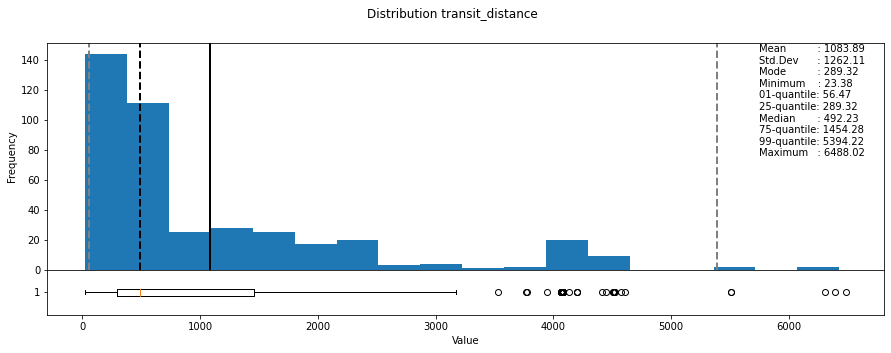

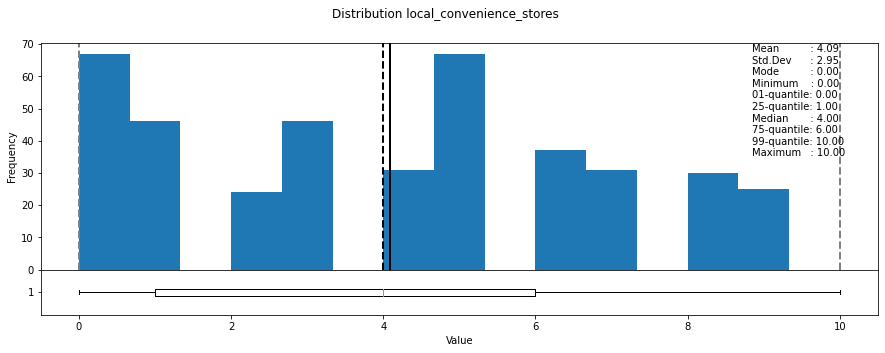

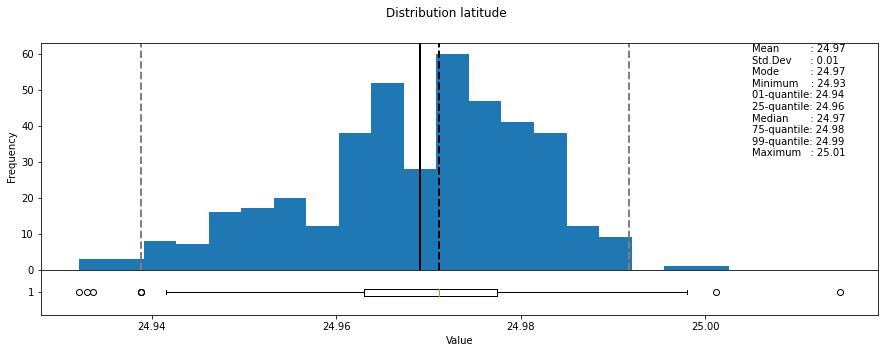

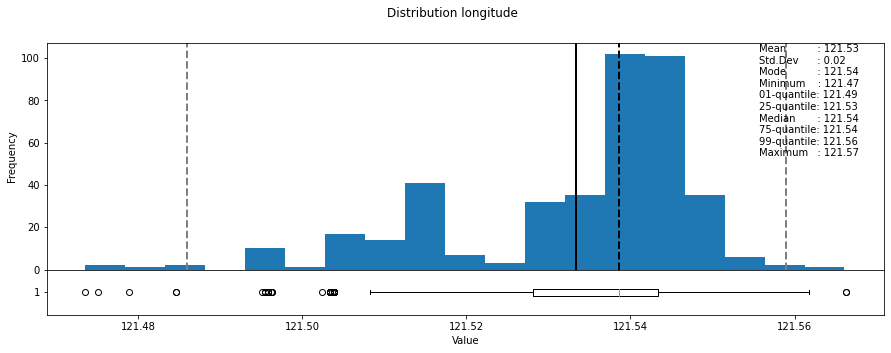

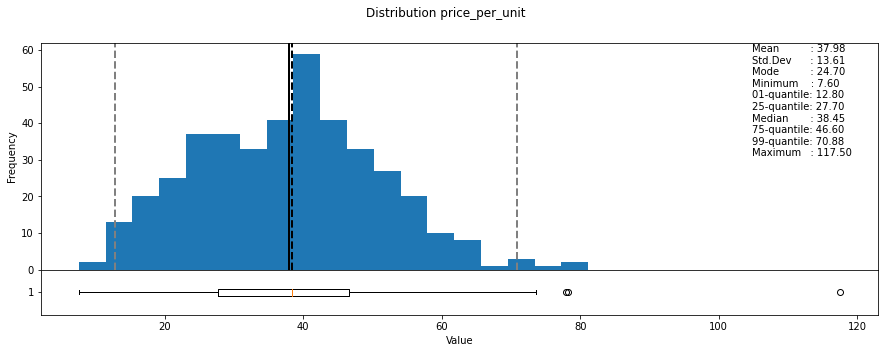

In [15]:
for ft in data.columns:
    print_stats(data[ft])

There are outliers for **transit_distance**,  **latitude** and **longitude** and **price_per_unit**.
I'll will delete the houses with:
* **transit_distance** greater than the 99-quantile
* ~~**latitude** greater than the 99-quantile~~
* **price_per_unit** greater than 100

In [52]:
q99_transit_distance = data['transit_distance'].quantile(.99)
#q99_latitude = data['latitude'].quantile(.99)


In [46]:
data = data[data['transit_distance'] <= q99_transit_distance]
#data = data[data['latitude'] <= q99_latitude]
data = data[data['price_per_unit'] <= 100]

## Feature Engineering

In [ ]:
First, extract the year and month from **transaction_date**.

In [61]:
data['transaction_year'] = np.trunc(data.transaction_date).astype(int)	
data['transaction_month'] = np.round((data.transaction_date - data['transaction_year'])*12 ,0).astype(int) + 1


Lets make a scatterplot of **latitude** and **longitude** to see if there are houses out of range. 

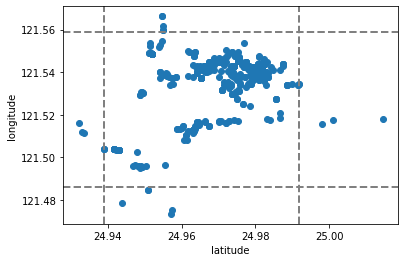

In [54]:
# quantiles
qlat_01 = data['latitude'].quantile(0.01)
qlat_99 = data['latitude'].quantile(0.99)
qlon_01 = data['longitude'].quantile(0.01)
qlon_99 = data['longitude'].quantile(0.99)

# the plot
plt.scatter(x =  data['latitude'], y =  data['longitude'])
plt.xlabel("latitude")
plt.ylabel("longitude")

# quantile lines
plt.axvline(x = qlat_01, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.axvline(x = qlat_99, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.axhline(y = qlon_01, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.axhline(y = qlon_99, color = 'gray', linestyle = 'dashed', linewidth = 2)

Let's look at the distributions again

In [ ]:
I want to cluster the position. First we need to scale the latitude and longitude.

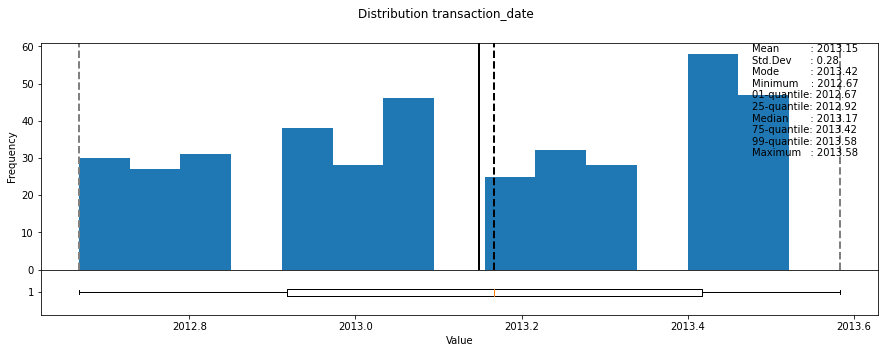

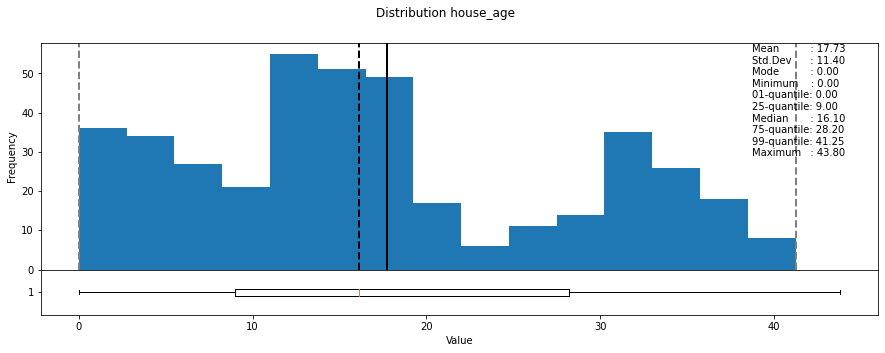

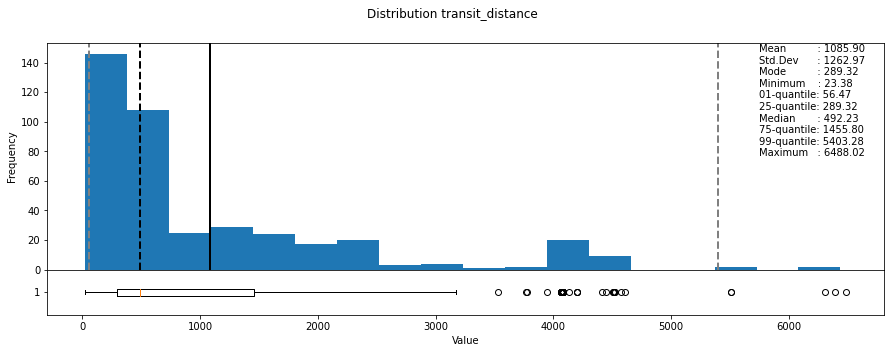

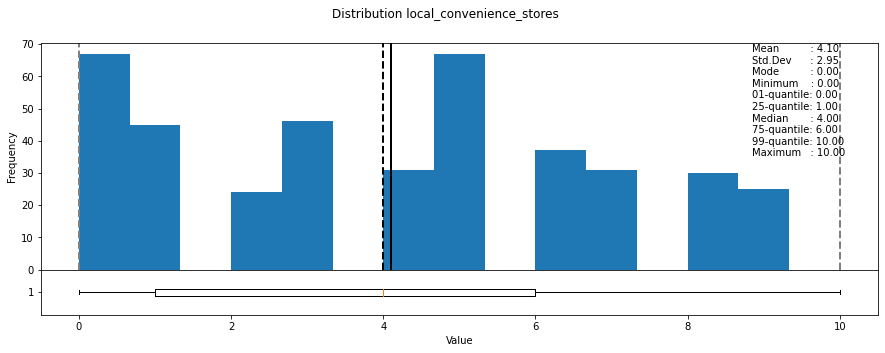

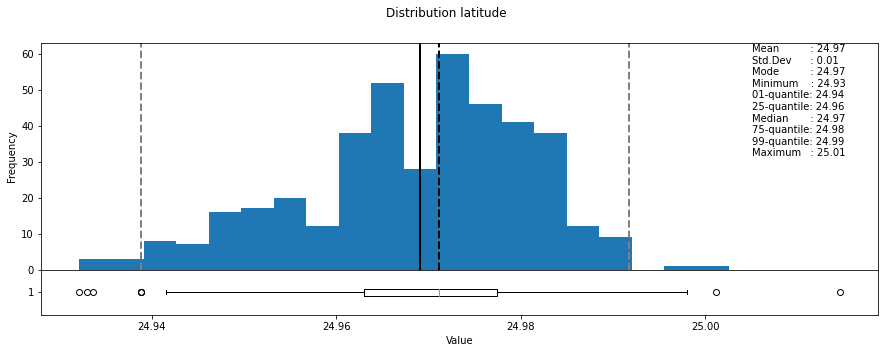

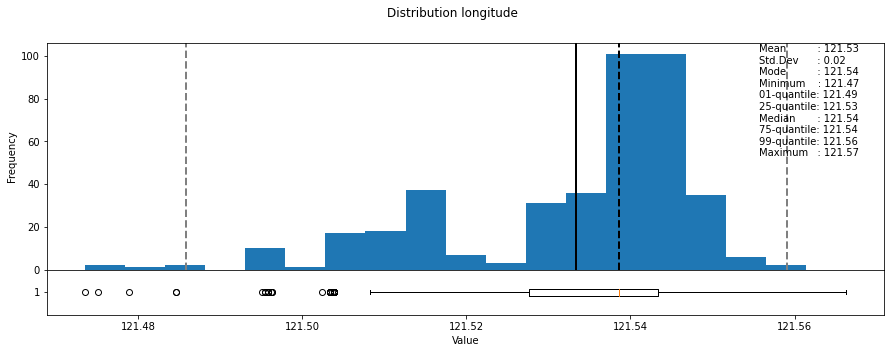

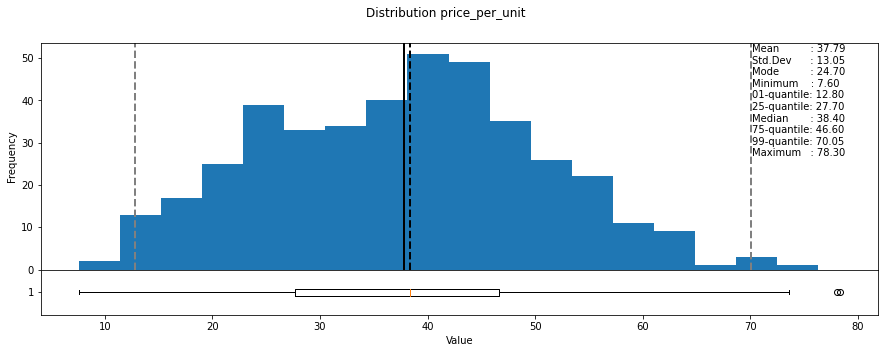

In [49]:
for ft in data.columns:
    print_stats(data[ft])

In [ ]:
Now, let's see if there

In [43]:
data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,12
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,12
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,8
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,7
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,11
...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,9
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,4
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,1


In [32]:
np.sort(np.round((data['month'].unique() * 12)).astype(int) + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

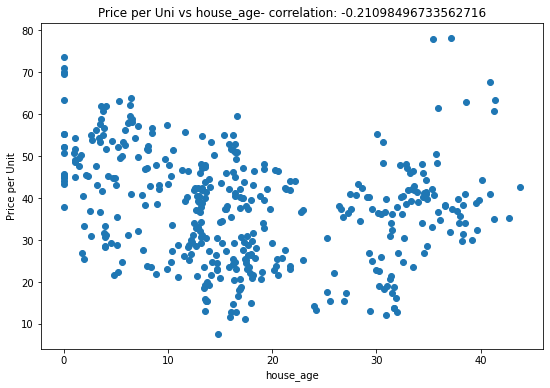

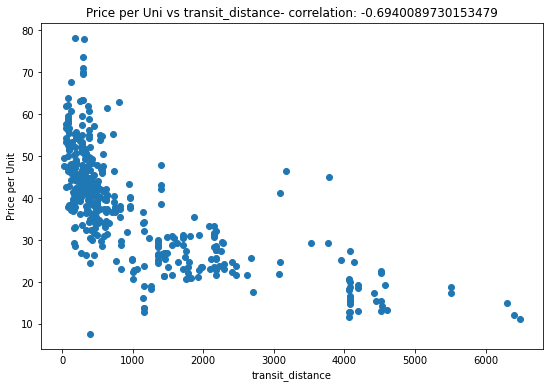

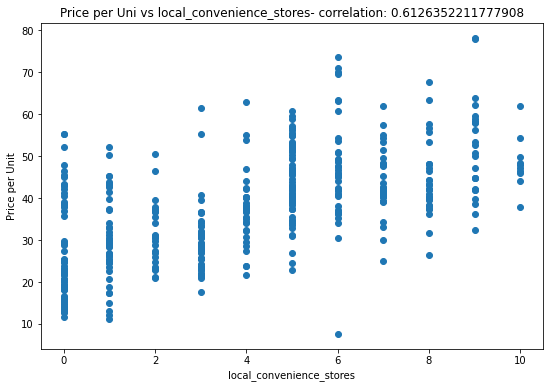

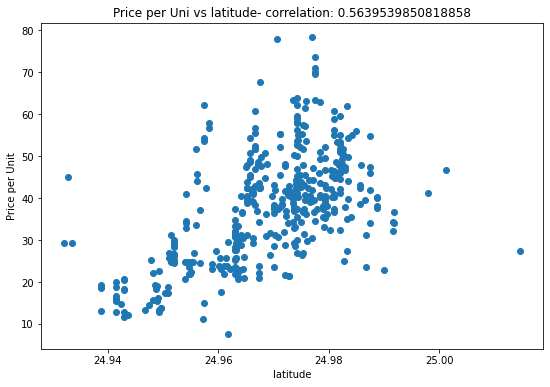

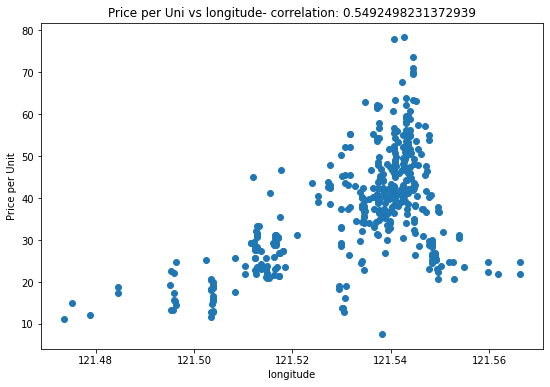

In [50]:
numeric_features =[ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('Price per Unit')
    ax.set_title('Price per Uni vs ' + col + '- correlation: ' + str(correlation))
plt.show()
